In [10]:

import numpy as np

import yt
from yt.visualization.base_plot_types import get_multi_plot
import trident

import argparse
import os
import glob
import sys

try:
    import cPickle as pickle
except ImportError:
    import pickle

from astropy.table import Table

from consistency import *
from get_refine_box import get_refine_box
from get_halo_center import get_halo_center
from get_proper_box_size import get_proper_box_size
from get_run_loc_etc import get_run_loc_etc

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
import matplotlib.colorbar as cb
from matplotlib.colors import LogNorm


In [11]:

density_color_map = sns.blend_palette(("black","#984ea3","#d73027","darkorange","#ffe34d","#4daf4a","white"), as_cmap=True)
density_proj_min = 5e-2  ## msun / pc^2
density_proj_max = 1e4
density_slc_min = 5e-8  ## msun / pc^3
density_slc_max = 5

metal_color_map = sns.blend_palette(("black","#984ea3","#4575b4","#4daf4a","#ffe34d","darkorange"), as_cmap=True)
metal_min = 1.e-4
metal_max = 3.
metal_density_min = 1.e-5
metal_density_max = 250.

temperature_color_map = sns.blend_palette(("black","#d73027","darkorange","#ffe34d"), as_cmap=True)
temperature_min = 5.e6
temperature_max = 1.e4


In [3]:
dsn = yt.load('/Users/molly/foggie/halo_008508/nref11n/natural/RD0020/RD0020')
dsr = yt.load('/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0020/RD0020')
trackname = '/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track'

yt : [INFO     ] 2018-08-23 16:51:46,641 Parameters: current_time              = 154.80118773327
yt : [INFO     ] 2018-08-23 16:51:46,642 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-08-23 16:51:46,644 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-08-23 16:51:46,645 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-08-23 16:51:46,646 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-08-23 16:51:46,647 Parameters: current_redshift          = 1.9999976253354
yt : [INFO     ] 2018-08-23 16:51:46,648 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-08-23 16:51:46,648 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-08-23 16:51:46,649 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-08-23 16:51:46,683 Parameters: current_time              = 154.80103271743
yt : [INFO     ] 2018-08-23 16:51:46,684 Parameters: domain_dimensions         = [256 

In [4]:
track = Table.read(trackname, format='ascii')
track.sort('col1')
zsnap = dsn.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(dsn)
refine_boxr, refine_box_centerr, refine_width = get_refine_box(dsr, zsnap, track)
refine_boxn, refine_box_centern, refine_width = get_refine_box(dsn, zsnap, track)
refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
search_radius = 10.
this_search_radius = search_radius / (1+dsr.get_parameter('CosmologyCurrentRedshift'))
centerr, velocity = get_halo_center(dsr, refine_box_centerr, radius=this_search_radius)
centern, velocity = get_halo_center(dsn, refine_box_centern, radius=this_search_radius)

print('halo center = ', centerr, ' and refine_box_center = ', refine_box_centerr)
print('halo center = ', centern, ' and refine_box_center = ', refine_box_centern)

width = default_width
width_code = width / proper_box_size ## needs to be in code units
boxr = dsr.r[centerr[0] - 0.5*width_code : centerr[0] + 0.5*width_code, \
          centerr[1] - 0.5*width_code : centerr[1] + 0.5*width_code, \
              centerr[2] - 0.5*width_code : centerr[2] + 0.5*width_code]
boxn = dsn.r[centern[0] - 0.5*width_code : centern[0] + 0.5*width_code, \
          centern[1] - 0.5*width_code : centern[1] + 0.5*width_code, \
              centern[2] - 0.5*width_code : centern[2] + 0.5*width_code]


Parsing Hierarchy : 100%|██████████| 4574/4574 [00:00<00:00, 29094.11it/s]

get_halo_centers:  code_length code_velocity



yt : [INFO     ] 2018-08-23 16:51:47,351 Gathering a field list (this may take a moment.)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f
Parsing Hierarchy : 100%|██████████| 1449/1449 [00:00<00:00, 28095.04it/s]
yt : [INFO     ] 2018-08-2

Located the main halo at: [0.4940309524536133, 0.48897266387939453, 0.5021486282348633] [-0.0018157845190406017 code_velocity, -0.001276310436617975 code_velocity, 0.00030539081653064914 code_velocity]
get_halo_centers:  code_length code_velocity
Located the main halo at: [0.4940328598022461, 0.4889516830444336, 0.5021543502807617] [-0.000710796272786302 code_velocity, -0.0011996039235395084 code_velocity, -0.0005677603377555342 code_velocity]
halo center =  [0.4940309524536133, 0.48897266387939453, 0.5021486282348633]  and refine_box_center =  [0.494032, 0.488924, 0.502169]
halo center =  [0.4940328598022461, 0.4889516830444336, 0.5021543502807617]  and refine_box_center =  [0.494032, 0.488924, 0.502169]


In [5]:
%matplotlib notebook

In [14]:

## OK, set up the grid
## adopted from http://yt-project.org/doc/cookbook/complex_plots.html
orient = 'vertical'
fig, axes, colorbars = get_multi_plot(2, 3, colorbar=orient, bw = 5, dpi=300, cbar_padding = 0.2)

slcn = yt.SlicePlot(dsn, 'x', fields=["density","temperature","metallicity"],
                    center=centern,  width=(1.5*width, 'kpc'))
slcr = yt.SlicePlot(dsr, 'x', fields=["density","temperature","metallicity"],
                    center=centerr,  width=(1.5*width, 'kpc'))

slcn.set_unit(('gas','density'),'Msun/pc**3')
slcr.set_unit(('gas','density'),'Msun/pc**3')
slcn_frb = slcn.data_source.to_frb((1.5*width, 'kpc'), 2048)
slcr_frb = slcr.data_source.to_frb((1.5*width, 'kpc'), 2048)

dens_axes = [axes[0][0], axes[0][1]]
temp_axes = [axes[1][0], axes[1][1]]
metal_axes = [axes[2][0], axes[2][1]]

for dax, tax, zax in zip(dens_axes, temp_axes, metal_axes) :
    dax.xaxis.set_visible(False)
    dax.yaxis.set_visible(False)
    tax.xaxis.set_visible(False)
    tax.yaxis.set_visible(False)
    zax.xaxis.set_visible(False)
    zax.yaxis.set_visible(False)

slc_densn = np.array(slcn_frb['density'])
slc_tempn = np.array(slcn_frb['temperature'])
slc_metaln = np.array(slcn_frb['metallicity'])
slc_densr = np.array(slcr_frb['density'])
slc_tempr = np.array(slcr_frb['temperature'])
slc_metalr = np.array(slcr_frb['metallicity'])

plots = [dens_axes[0].imshow(slc_densn, origin='lower', norm=LogNorm()),
         dens_axes[1].imshow(slc_densr, origin='lower', norm=LogNorm()),
         temp_axes[0].imshow(np.log10(slc_tempn), origin='lower'),
         temp_axes[1].imshow(np.log10(slc_tempr), origin='lower'),
         metal_axes[0].imshow(slc_metaln, origin='lower', norm=LogNorm()),
         metal_axes[1].imshow(slc_metalr, origin='lower', norm=LogNorm())]

#plots[0].set_clim((density_slc_min, density_slc_max))
plots[0].set_cmap(density_color_map)
#plots[1].set_clim((density_slc_min, density_slc_max))
plots[1].set_cmap(density_color_map)
plots[2].set_clim((temperature_min, temperature_max))
plots[2].set_cmap(temperature_color_map)
plots[3].set_clim((temperature_min, temperature_max))
plots[3].set_cmap(temperature_color_map)
plots[4].set_clim((metal_min, metal_max))
plots[4].set_cmap(metal_color_map)
plots[5].set_clim((metal_min, metal_max))
plots[5].set_cmap(metal_color_map)

titles=[r'$\mathrm{Density}\ (\mathrm{g\ cm^{-3}})$',
        r'$\mathrm{Temperature}\ (\mathrm{K})$',
        r'$\mathrm{Metallicity}\ (\mathrm{Z_{\odot}})$']

for p, cax, t in zip(plots[0:6:2], colorbars, titles):
    cbar = fig.colorbar(p, cax=cax, orientation=orient)
    cbar.set_label(t, fontsize=16.)



yt : [INFO     ] 2018-08-23 16:55:44,229 xlim = 0.487622 0.490281
yt : [INFO     ] 2018-08-23 16:55:44,229 ylim = 0.500825 0.503484
yt : [INFO     ] 2018-08-23 16:55:44,230 xlim = 0.487622 0.490281
yt : [INFO     ] 2018-08-23 16:55:44,231 ylim = 0.500825 0.503484
yt : [INFO     ] 2018-08-23 16:55:44,233 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [INFO     ] 2018-08-23 16:55:44,347 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-08-23 16:55:44,354 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2018-08-23 16:55:46,026 xlim = 0.487643 0.490302
yt : [INFO     ] 2018-08-23 16:55:46,027 ylim = 0.500819 0.503478
yt : [INFO     ] 2018-08-23 16:55:46,028 xlim = 0.487643 0.490302
yt : [INFO     ] 2018-08-23 16:55:46,028 ylim = 0.500819 0.503478
yt : [INFO     ] 2018-08-23 16:55:46,032 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [INFO     ] 2018-08

In [15]:
fig.savefig('test.png')

ValueError: minvalue must be less than or equal to maxvalue

yt : [INFO     ] 2018-08-23 16:56:51,966 xlim = 0.487622 0.490281
yt : [INFO     ] 2018-08-23 16:56:51,967 ylim = 0.500825 0.503484
yt : [INFO     ] 2018-08-23 16:56:51,968 xlim = 0.487622 0.490281
yt : [INFO     ] 2018-08-23 16:56:51,969 ylim = 0.500825 0.503484
yt : [INFO     ] 2018-08-23 16:56:51,970 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



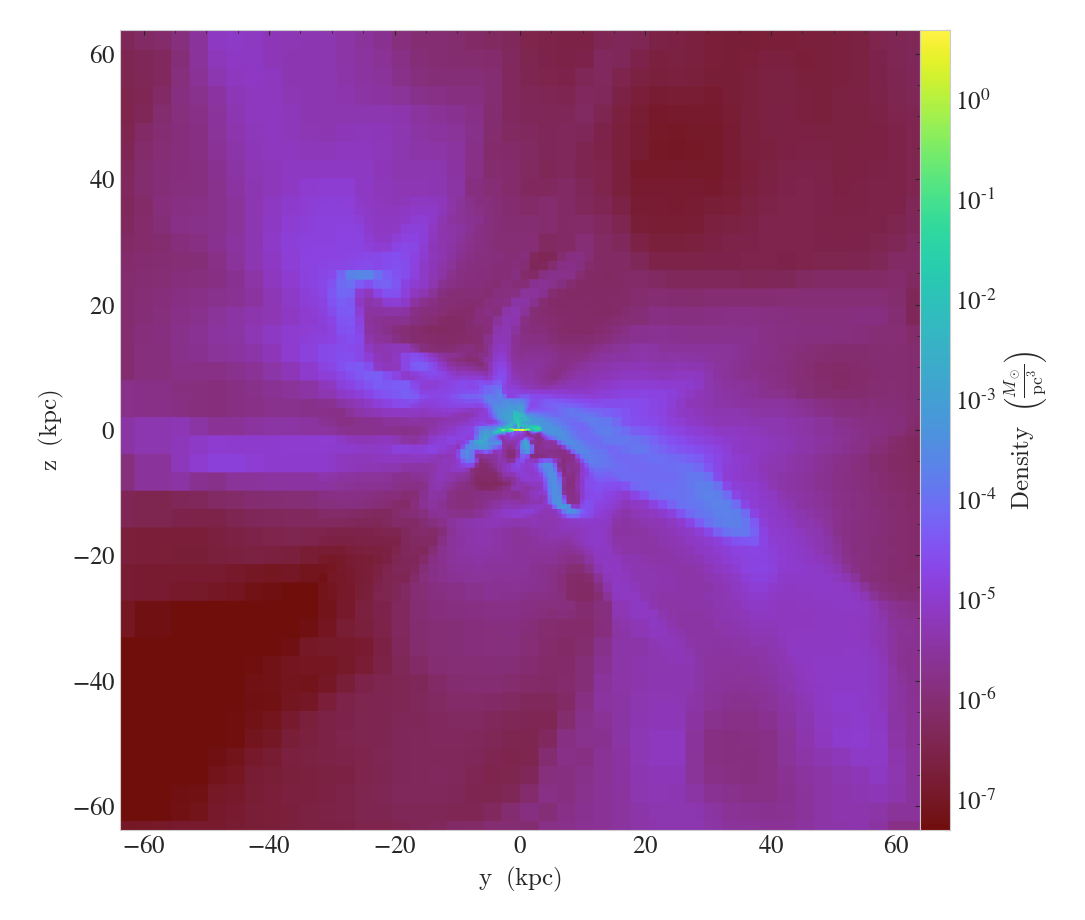

In [17]:
slcn = yt.SlicePlot(dsn, 'x', 'density', center=centern,  width=(1.5*width, 'kpc'))
slcn.set_unit(('gas','density'),'Msun/pc**3')
slcn.set_zlim('density', density_slc_min, density_slc_max)



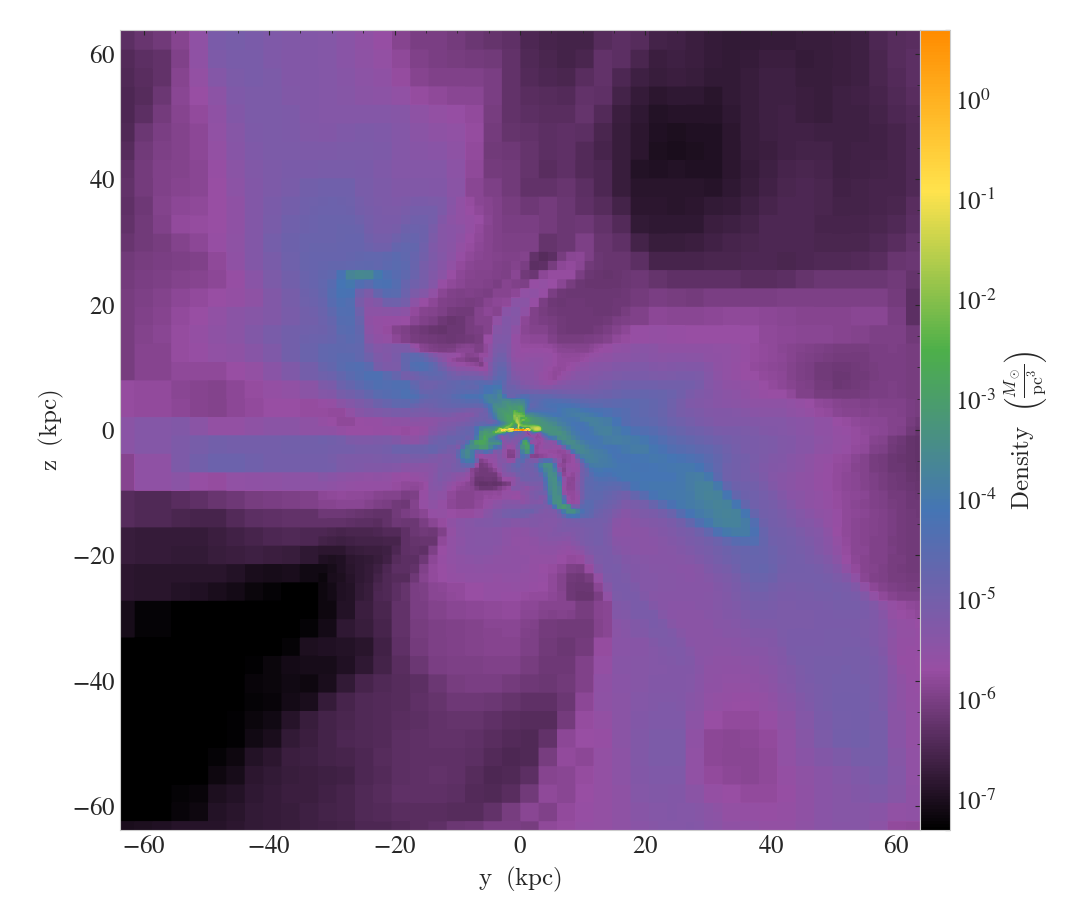

In [21]:
slcn.set_cmap(field='density', cmap=metal_color_map)


yt : [INFO     ] 2018-08-23 17:09:14,784 xlim = 0.487622 0.490281
yt : [INFO     ] 2018-08-23 17:09:14,785 ylim = 0.500825 0.503484
yt : [INFO     ] 2018-08-23 17:09:14,786 xlim = 0.487622 0.490281
yt : [INFO     ] 2018-08-23 17:09:14,787 ylim = 0.500825 0.503484
yt : [INFO     ] 2018-08-23 17:09:14,788 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



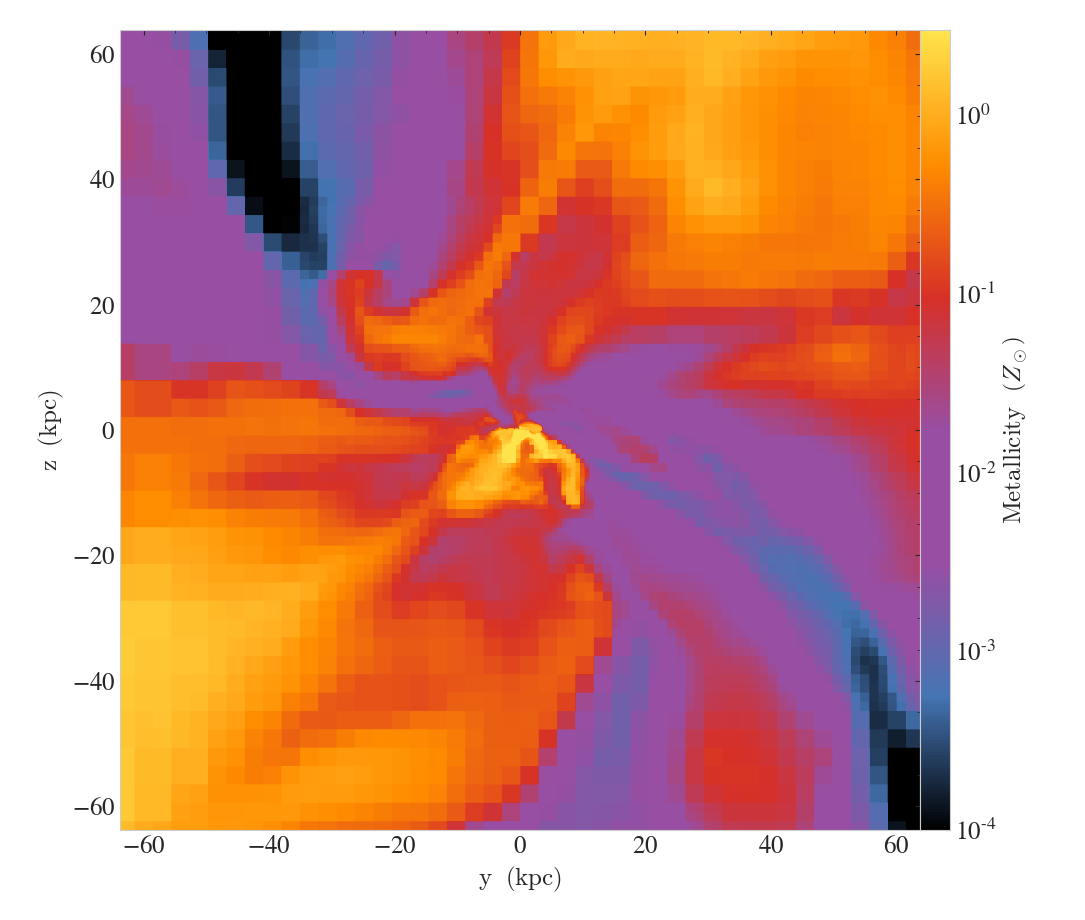

In [28]:
new_metal_color_map = sns.blend_palette(("black","#4575b4","#984ea3","#984ea3","#d73027","darkorange","#ffe34d"), as_cmap=True)
slcn = yt.SlicePlot(dsn, 'x', 'metallicity', center=centern,  width=(1.5*width, 'kpc'))
slcn.set_zlim('metallicity', metal_min, metal_max)
slcn.set_cmap(field='metallicity', cmap=new_metal_color_map)
